# Capstone Module-2

## Introduction

In business, it is essential to understand customers’ behavior in order to evaluate as well as optimize strategies to boost more profit. Data analysis and visualization play a crucial role in this regard. This process transforms raw data into meaningful information. This approach is hoped to deliver information and insights for the relevant stakeholders. Aiming to be a basis to make decision. 

In this study, a dataset about supermarket customers’ will be analyzed. Through visualizations, key patterns in purchasing preferences, campaigns and demographics will be presented. Lastly, actionable recommendations will be provided.

## Load Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\ATINA\Documents\PWD\Handout Slides\Modul 2-done\capstone\dataset\SupermarketCustomers.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Exploration and Cleaning

In [3]:
shape = df.shape

print(f"Number of rows: {shape[0]}")
print(f"Number of columns: {shape[1]}")

Number of rows: 2240
Number of columns: 29


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

There are 2240 rows and 29 columns in this dataset, meaning there area 2240 customers and 29 information about each customer. The information is grouped into 4 categories, which are: 

**People**
1. ID: unique identifier
2. Year_Birth: birth year
3. Marital_Status: marital status
4. Income: Yealy household income
5. Kidhome: Number of children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Dt_Customer: Date of customer's enrollment with the company
8. Recency: Number of days since customer's last purchase
9. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**:
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalog
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


Dt_Customer is object, thus it will be converted to date time.

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\ATINA\AppData\Local\Temp\ipykernel_12868\177162232.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


### Check null values

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 customers with NaN Income as shown in code below. The data will be checked for its normality and if it is normal, meean value will be used to fill in the empty value. Otherwise, median is used.

In [9]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


C:\Users\ATINA\AppData\Local\Temp\ipykernel_12868\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

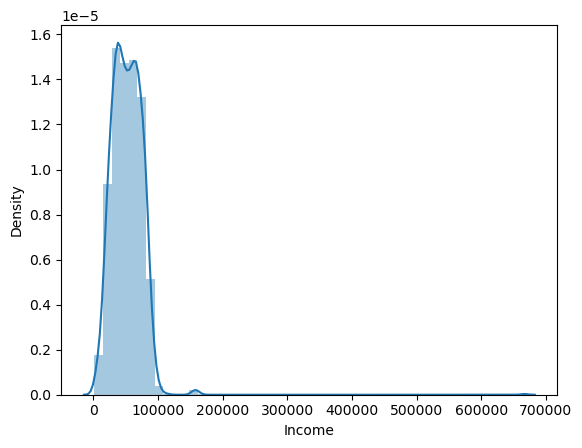

In [10]:
sns.distplot(df['Income'])

In [11]:
import statsmodels.api as sm
import pylab

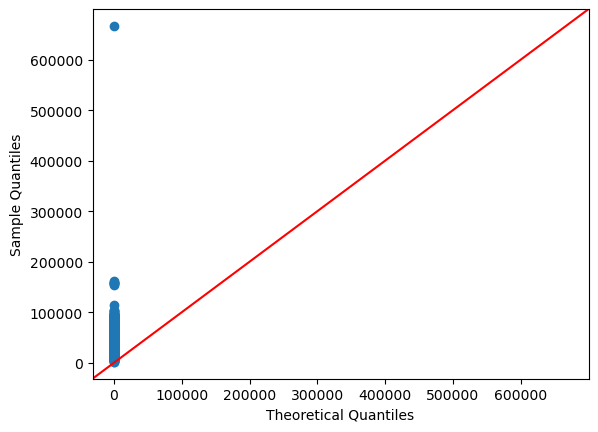

In [12]:
sm.qqplot(df['Income'], line='45')
pylab.show()

as it can be seen from the plots above, the data is not normally distributed, thus the median will be used to fill in the empty value

In [13]:
median = df['Income'].median()
median

51381.5

In [14]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [15]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### Check Duplicates

In [16]:
duplicates = df[df.duplicated(subset=['ID'])]
duplicates

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [17]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

There is no duplicates in the dataset

### Check Values and Outliers

In [18]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

- 'Basic' will be changed to 'Secondary'
- 'Graduation' will be changed to 'Bachelor'. This means to avoid confusion as in fact 'Graduation' refers to a completion of formal education, but does not refer to educational level
- '2n Cycle' means Master, therefore it will be changed to 'Master'


In [19]:
df.loc[df['Education'] == 'Basic', 'Education'] = 'Secondary'
df.loc[df['Education'] == 'Graduation', 'Education'] = 'Bachelor'
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master'
df['Education'].value_counts()

Bachelor     1127
Master        573
PhD           486
Secondary      54
Name: Education, dtype: int64

In [20]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Here, the terms are excessive as there are several terms refer to one thing. The purpose of this column is to relate the the customers' marital status with the customers' behaviour. Thus, too specific terminology is not necessary. Beside that, the proportion of such 'uncommon' terms is not significant and cannot produce interesting insight. These terms will be simplified and re-defined as follows:
- 'Alone', 'Absurd', and 'YOLO' will be classified as 'Single'. 'Absurd' is refer to an uncertain relationship status and in this case this can be formally classified as 'Single'. 'YOLO', stands for You Only Live Once, refers to a condition where someone does not want to have a commitment and will fully enjoy life as someone 'free', thus this can be formally classified as 'Single'

In [21]:
df.loc[df['Marital_Status'].isin(['YOLO', 'Absurd','Alone']), 'Marital_Status'] = 'Single'
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [22]:
age = df['Year_Birth'].value_counts().sort_index()
age

1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: Year_Birth, dtype: int64

Deleting data earlier than 1940

In [23]:
df.drop(df[df['Year_Birth'] <1940].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
#outlier in Income

#Change outlier to median as we can see the max is outlier

df.loc[df['Income'] == df['Income'].max()] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,9432,1977,Bachelor,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [25]:
#the value is replaced with median

df.loc[df['Income'] == df['Income'].max(), 'Income'] = df['Income'].median()

### Adding new columns titled generation

The grouping is referred to this https://www.pewresearch.org/short-reads/2019/01/17/where-millennials-end-and-generation-z-begins/

In [26]:
def generation(year_birth):
    if 1940 <= year_birth <= 1945:
        return 'Silent'
    elif 1946 <= year_birth <= 1964:
        return 'Boomers'
    elif 1965 <= year_birth <= 1980:
        return 'Gen X'
    else:
        return 'Millennials'

In [27]:
df['Generation'] = df['Year_Birth'].apply(generation)

#### Check normality of each products

There are different ways to check normality, first is using graphical method and second is using statistic formula. Graphical method was used above for checking the normality of income data. To have more straighforward result and to implement another method, here and forward, the statistic formula is going to be used. 

Knowing the distribution of the data is crucial as it will detrmine the method for statistical test (parametric for normal and non-parametric for not normal)

In [28]:
from scipy.stats import normaltest

list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in list:
    stats, pval=normaltest(df[i])
    
    print(f'The result for {i}:')
    if pval<=0.05:
        print('Not Normal') 
        print('\n')
    else: 
        print('Normal') 

The result for MntWines:
Not Normal


The result for MntFruits:
Not Normal


The result for MntMeatProducts:
Not Normal


The result for MntFishProducts:
Not Normal


The result for MntSweetProducts:
Not Normal


The result for MntGoldProds:
Not Normal




#### Check normality for each purchase place and number of deals 

In [29]:
list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

for i in list:
    stats, pval=normaltest(df[i])
    
    print(f'The result for {i}:')
    if pval<=0.05:
        print('Not Normal') 
        print('\n')
    else: 
        print('Normal') 

The result for NumWebPurchases:
Not Normal


The result for NumCatalogPurchases:
Not Normal


The result for NumStorePurchases:
Not Normal


The result for NumWebVisitsMonth:
Not Normal


The result for NumDealsPurchases:
Not Normal




## Get Insights

There are two main steps in pulling an insight from a dataset, data visualization and statistical testing. It is a common debate wether to perform statistical analysis or visualizing the data first. However, in this analysis, data visualization will be performed initlally, followed by statistical analysis. 

Data visualization will help to first visually explore and understand the data, identifying patterns trends and anomalies which may not be apparent from statistical test alone. This process will also help the process of hypotesis generation.

Statistical testing is substantial to validate the hypotesis made from visual observation.



### 1. Spending Patterns by Generations

In this analysis, customer is differentiated by generation to see spending habits on certain producs accross generation.

In [30]:
generation_spending = df.groupby('Generation')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                'MntFishProducts', 'MntSweetProducts', 
                                                'MntGoldProds']].median()

In [31]:
generation_spending.reindex(['Silent', 'Boomers', 'Gen X', 'Millennials'])

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Generation,,,,,,
Silent,507.5,35.5,238.5,62.0,30.5,28.0
Boomers,290.0,11.0,96.0,16.0,11.0,30.0
Gen X,135.0,6.0,52.0,10.0,7.0,21.0
Millennials,52.0,9.0,54.0,13.0,9.0,22.0


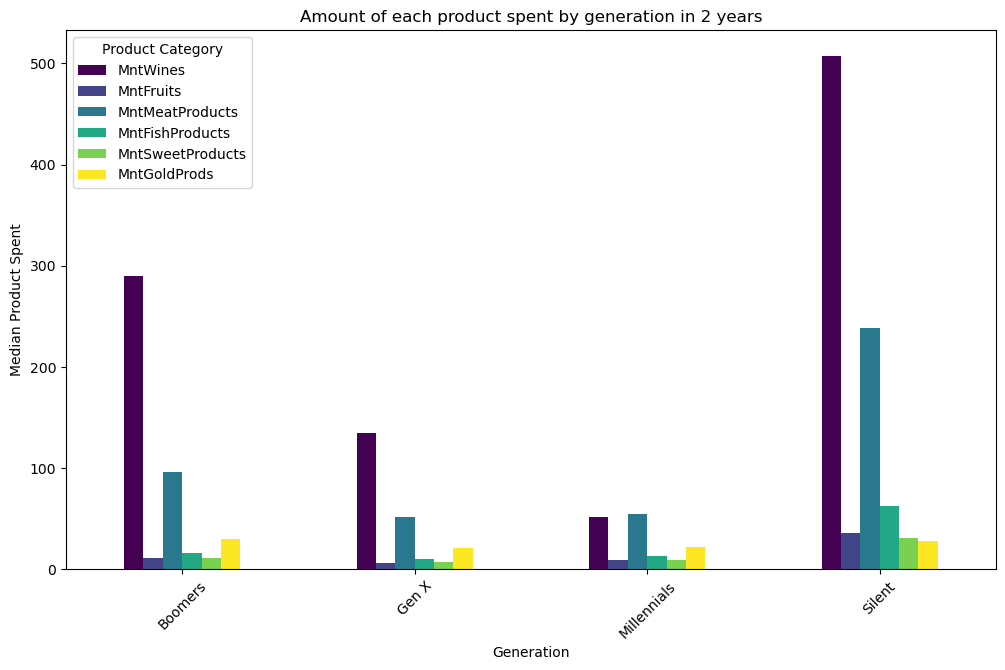

In [51]:
generation_spending.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Amount of each product spent by generation in 2 years')
plt.xlabel('Generation')
plt.ylabel('Median Product Spent')
plt.xticks(rotation=45)
plt.legend(title='Product Category', loc='best')
plt.savefig('spending for each generation')

The figure above shows there are differences in producst accross generation. To validate this result, statistical test is performed using Kruskal-Wallis test. 

- H0: there are no significant differences in each product spending among different generations
- H1: there are significant differences in each product spending among different generations

In [33]:
from scipy.stats import kruskal

list = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in list:
    groups = [df[i][df['Generation'] == gen] for gen in df['Generation'].unique()]
    stat, pvalue = kruskal(*groups)
    print(f'{i}:')
    print(f"Statistic: {stat:.4f}")
    print(f"pvalue: {pvalue:.4f}")

    alpha = 0.05
    if pvalue < 0.05:
        print('Reject H0')
        print('\n')
    else:
        print('Fail to reject H0')
        print('\n')

MntWines:
Statistic: 112.2497
pvalue: 0.0000
Reject H0


MntFruits:
Statistic: 23.2817
pvalue: 0.0000
Reject H0


MntMeatProducts:
Statistic: 42.3325
pvalue: 0.0000
Reject H0


MntFishProducts:
Statistic: 27.4162
pvalue: 0.0000
Reject H0


MntSweetProducts:
Statistic: 13.8862
pvalue: 0.0031
Reject H0


MntGoldProds:
Statistic: 20.3279
pvalue: 0.0001
Reject H0




Statistical test shows there is a correlation between products and generation, as everything shows reject h0.

There is a prominent trend between older generations (silent and Boomers) and younger generations (Gen X and Millennials). This trend is caused by chaning consumption patterns. Older generations spend more in all categories. This different in preferences might resulted because of different income, lifestyle or culture. However, all generations show high interest in luxury products such as wine and gold.

Younger generations spend less in all categories, with millennials shows the lowest in overall spending. This might reflect financial limitations or preference in product types which is not mentioned (vegetables, bread, and dairy). 

Tailoring strategies based on generational preferences to market these products can be implemented. Focusing on premium offerings for older generations and budget-friendly for younger customers.

### 2. Preferred Purchasing Channel by Generations

Compare the number of purchases made through different channels (web, catalog, and store) and examine customer characteristics or demographics associated with each. This helps in optimizing resources for the most popular channels.

In [34]:
generation_place = df.groupby('Generation')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median()

generation_place = generation_place.reindex(['Silent', 'Boomers', 'Gen X', 'Millennials'])
generation_place

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Generation,,,
Silent,6.0,4.5,6.0
Boomers,4.0,2.0,6.0
Gen X,3.0,1.0,4.0
Millennials,3.0,1.0,4.0


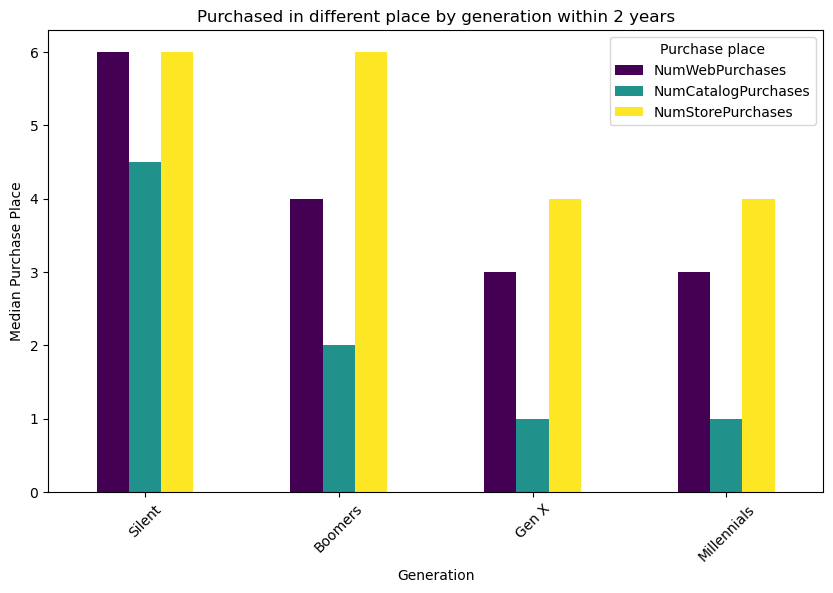

In [53]:
generation_place.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Purchased in different place by generation within 2 years')
plt.xlabel('Generation')
plt.ylabel('Median Purchase Place')
plt.xticks(rotation=45)
plt.legend(title='Purchase place')
plt.savefig('place for each generation')

The result above shows that there are significant differences between purchase place accross generations. To validate the visualisation above, Kruskal-Wallis Test is going to be performed as the normality is not met. 

- H0: there are no significant differences in purschasing channel among different generations
- H1: there are significant differences in purschasing channel among different generations

In [36]:
list = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for i in list:
    groups = [df[i][df['Generation'] == gen] for gen in df['Generation'].unique()]
    stat, pvalue = kruskal(*groups)
    print(f'{i}:')
    print(f"Statistic: {stat:.4f}")
    print(f"pvalue: {pvalue:.4f}")

    alpha = 0.05
    if pvalue < 0.05:
        print('Reject H0')
        print('\n')
    else:
        print('Fail to reject H0')
        print('\n')

NumWebPurchases:
Statistic: 57.3467
pvalue: 0.0000
Reject H0


NumCatalogPurchases:
Statistic: 86.1928
pvalue: 0.0000
Reject H0


NumStorePurchases:
Statistic: 66.0511
pvalue: 0.0000
Reject H0


NumWebVisitsMonth:
Statistic: 62.6561
pvalue: 0.0000
Reject H0




Supporting the previous analysis, silent generation has the highest transaction, followed by gen x. This shows that older generations have higher purchasing power.

Surprisingly, silent generation has high number of web purchases, indicating an increase in adaptation and acceptance of online shopping while the other older generation still beginning to engage with online purchasing. 

Despite of the online-shopping era, physical-store experience is still valued accross generation. Exposure of technology which dominantly experienced by younger generations, does not guarantee preference in online shopping.

This preferences can also be related with the products. For example, Boomers with quite high spending levels on products like wine and gold prefer to have in-store purchase as those products require more personal experience.

Another common aggreement between generations is that catalog purchases has the lowest engagament. Even tough in-store purchase is still preffered, we cannot ignore that we are shifting from traditional marketing to digital channels. 


Recpmmendations:
Stakeholders can now be more focused on putting a campaign in physical store and web. To engange gen x and millennialls, campaign such as discounts or limited-time offers could drive higher engagement. However, in this case, in-store promotions or loyalty programs can be more effective, comparing to web purchase which is considerably limited. Meanwhile, flexible campaigns across all channels for Silent generations, because they are more comofrtable using various puchasing channel and willing to buy from multiple place.

### 3. Income Influence and Spending

As from the analysis above we have seen spending and place purchase between generation, we can now see the income to explore the relation between the products bought and the income. 
Investigate if higher-income customers spend more on luxury products like wine and gold. This insight can guide marketing strategies for different income segments.

In [37]:
income_generation = df.groupby('Generation')['Income'].median()

income_generation = income_generation.reindex(['Silent', 'Boomers', 'Gen X', 'Millennials'])

income_generation

Generation
Silent         65174.0
Boomers        57333.0
Gen X          48178.0
Millennials    39660.0
Name: Income, dtype: float64

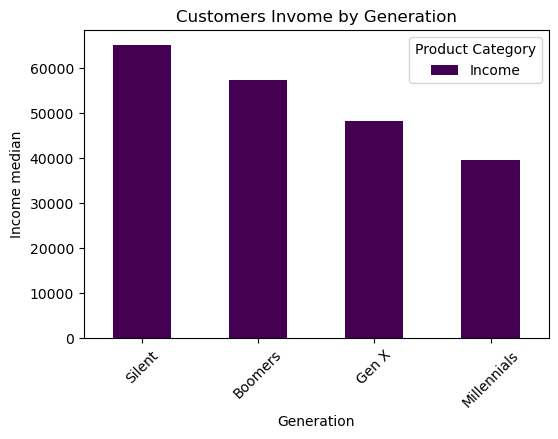

In [54]:
income_generation.plot(kind='bar', figsize=(6, 4), colormap='viridis')
plt.title('Customers Invome by Generation')
plt.xlabel('Generation')
plt.ylabel('Income median')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.savefig('Income')

Spearman Test is going to be performed as the normality is not met with hypothesis as follows:

- H0: there are no significant differences in each product spending among different income
- H1: there are significant differences in each product spending among different income

In [39]:
from scipy.stats import spearmanr

spearman_results = {}
list = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


for product in list:
    correlation, p_value = spearmanr(df['Income'], df[product])
    spearman_results[product] = {'correlation': correlation, 'p_value': p_value}
    
results_df = pd.DataFrame(spearman_results).T
print(results_df.round(4))

                  correlation  p_value
MntWines               0.8294      0.0
MntFruits              0.5793      0.0
MntMeatProducts        0.8147      0.0
MntFishProducts        0.5747      0.0
MntSweetProducts       0.5651      0.0
MntGoldProds           0.5044      0.0


Decline in trend from older to younger generation will reflect various factors such as economic conditions, career stages, lifestyle, purchasing power and products.

There correlation indicates the strength and direction of the relationship between income and spending accross various categories. Silent generation has the highest median income at 65174, which may relevant to their higher spending in product categories especially in luxirious goods.

Generations with lower income are implementing budget-conscious approach which prioritize essentials. 

Wine (0.82) and meat (0.81) products have the highest correlation among categories, implying higher spending in these two indicate higher income. 

Fruits (0.58) and fish (0.57) products show moderate correlation with income. They are puschased more widely across different income level but still trend higher with income increase. Other factors such as lifestyle choses (e.g., vegan), trend, health consciousness may also contribute in decision

Sweets (0.56) and gold (0.50) products have the lowest correlation, not influenced by income. This might be caused by these are independent of income and appeal the same through all income cohort. 


Recommendation:
1. Marketing strategies such as focusing on premium products for higher-income consumers while also offering value-oriented options for younger generations.

2. Products independent from income may attract all groupus, suggesting more inclusive pricing and promotional approach

### 4. Household Composition and Products

In [40]:
def household_type(row):
    if row['Kidhome'] > 0 and row['Teenhome'] > 0:
        return 'Children and Teenagers'
    elif row['Kidhome'] > 0:
        return 'Only Children'
    elif row['Teenhome'] > 0:
        return 'Only Teenagers'
    else:
        return 'No Children or Teenagers'

df['Household_Type'] = df.apply(household_type, axis=1)

household_spending = df.groupby('Household_Type')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                   'MntFishProducts', 'MntSweetProducts', 
                                                   'MntGoldProds']].median()
print(household_spending)

                          MntWines  MntFruits  MntMeatProducts  \
Household_Type                                                   
Children and Teenagers        44.0        2.0             19.0   
No Children or Teenagers     450.0       33.0            360.0   
Only Children                 16.0        3.0             18.0   
Only Teenagers               369.5       12.0             99.0   

                          MntFishProducts  MntSweetProducts  MntGoldProds  
Household_Type                                                             
Children and Teenagers                3.0               2.0          11.0  
No Children or Teenagers             59.0              35.0          42.0  
Only Children                         6.0               4.0          12.0  
Only Teenagers                       15.0              11.5          35.0  


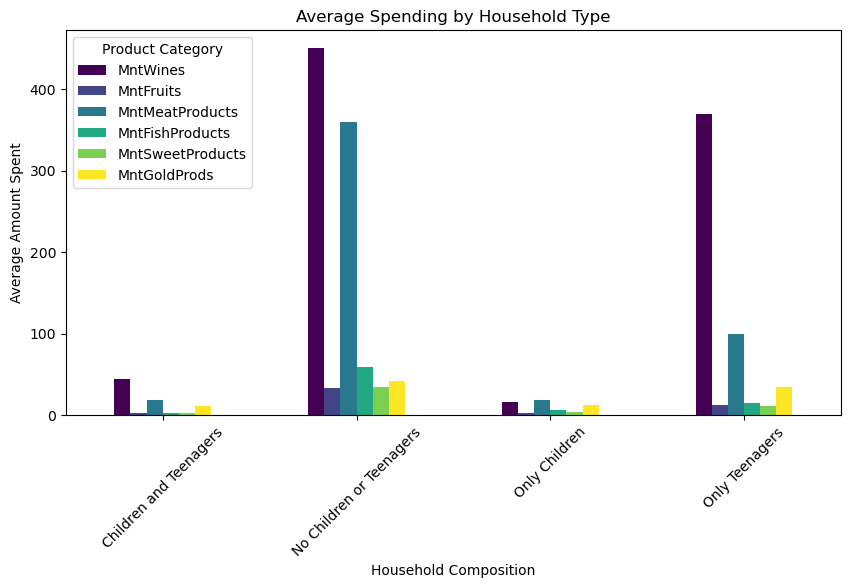

<Figure size 640x480 with 0 Axes>

In [60]:
household_spending.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Average Spending by Household Type')
plt.xlabel('Household Composition')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()
plt.savefig('Household Type')

- H0: there are no significant differences in each product spending among different household type
- H1: there are significant differences in each product spending among different household type

In [42]:
list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

for i in list:
    groups = [df[i][df['Household_Type'] == gen] for gen in df['Household_Type'].unique()]
    stat, pvalue = kruskal(*groups)
    print(f'{i}:')
    print(f"Statistic: {stat:.4f}")
    print(f"pvalue: {pvalue:.4f}")

    alpha = 0.05
    if pvalue < 0.05:
        print('Reject H0')
        print('\n')
    else:
        print('Fail to reject H0')
        print('\n')

MntWines:
Statistic: 800.4132
pvalue: 0.0000
Reject H0


MntFruits:
Statistic: 585.5134
pvalue: 0.0000
Reject H0


MntMeatProducts:
Statistic: 792.6424
pvalue: 0.0000
Reject H0


MntFishProducts:
Statistic: 631.2823
pvalue: 0.0000
Reject H0


MntSweetProducts:
Statistic: 554.1923
pvalue: 0.0000
Reject H0


MntGoldProds:
Statistic: 414.5242
pvalue: 0.0000
Reject H0




In [43]:
from scipy.stats import kruskal

# Extract income data based on household types
household_groups = [group['Income'].values for name, group in df.groupby('Household_Type')]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*household_groups)

# Display the result
print(f'Kruskal-Wallis test statistic: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

if p_value <= 0.05:
    print("Significant differences exist between household types regarding income.")
else:
    print("No significant differences between household types regarding income.")

Kruskal-Wallis test statistic: 806.8308
p-value: 0.0000
Significant differences exist between household types regarding income.


The result is reject H0 for all. This indicates there is statistically significant relationship between the products and the household type as well as between household type and income. 

There is a high statistic value across categories, with the strongest correlations are shown for wine (800.41) and meat products (792.64). These products are expensive, thus households without children or teenagers have higher bugdet on luxury items.

For another products such as fruits, fish, sweets, and gold, there is correlation wih household type but less influenced by the presence of children or teens.

Households with teenagers or children have more needs and essentials, thus they only prioritize valuable items. However, it is quite interesting they have low spending on fruits considering that it is important for their growth and health.

Recommendations:
1. Premium products promotion to households without children or teenagers
These households are more receptive to premium product promotions. Strategy such as loyalty program where a reward is given once certain spending patterns are detected. The reward can be in many forms such as discount and freebies
2. Bundle essentials for household with children 
Offering budget friendly bundles that group essential items. 
3. Seasonal and Occasional Based Discount
Promote products on holidays or special occasions such as back-to-school, holidays, and movie release.


### 5. Marital Status and Products

In [44]:
status_spending = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                   'MntFishProducts', 'MntSweetProducts', 
                                                   'MntGoldProds']].median()
print(status_spending)

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                          
Divorced           183.0        8.0             72.0             10.0   
Married            173.0        7.0             64.0             12.0   
Single             155.0        8.5             64.0             12.0   
Together           181.0        8.0             68.0             12.0   
Widow              332.0       12.0             83.0             23.0   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Divorced                     7.0          25.0  
Married                      8.0          22.0  
Single                       9.0          26.0  
Together                     9.0          24.0  
Widow                       11.0          38.0  


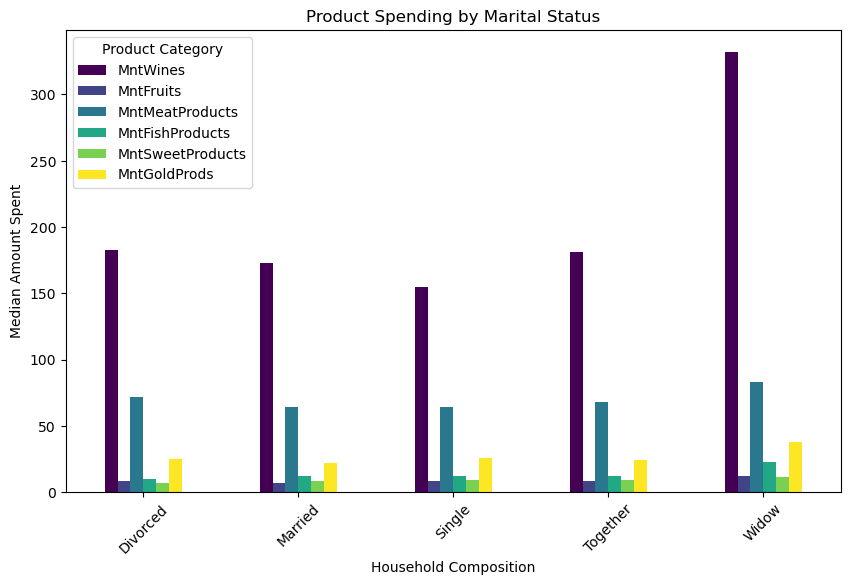

<Figure size 640x480 with 0 Axes>

In [57]:
status_spending.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Product Spending by Marital Status')
plt.xlabel('Household Composition')
plt.ylabel('Median Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()
plt.savefig('Marital status')

- H0: there are no significant differences in each product spending among different marital status
- H1: there are significant differences in each product spending among different marital status

Kurskal-Wallis test is used to check wether spending is influenced by marital status

In [46]:
list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

for i in list:
    groups = [df[i][df['Marital_Status'] == gen] for gen in df['Marital_Status'].unique()]
    stat, pvalue = kruskal(*groups)
    print(f'{i}:')
    print(f"Statistic: {stat:.4f}")
    print(f"pvalue: {pvalue:.4f}")

    alpha = 0.05
    if pvalue < 0.05:
        print('Reject H0')
        print('\n')
    else:
        print('Fail to reject H0')
        print('\n')

MntWines:
Statistic: 7.9443
pvalue: 0.0936
Fail to reject H0


MntFruits:
Statistic: 2.9277
pvalue: 0.5700
Fail to reject H0


MntMeatProducts:
Statistic: 3.3416
pvalue: 0.5024
Fail to reject H0


MntFishProducts:
Statistic: 4.6848
pvalue: 0.3212
Fail to reject H0


MntSweetProducts:
Statistic: 0.9682
pvalue: 0.9146
Fail to reject H0


MntGoldProds:
Statistic: 10.2259
pvalue: 0.0368
Reject H0




Based on the test result, most of them is Fail to reject H0, meaning there is no enough evident to conclude there is a signigicant differences accross marital status and products, except for gold products. 

For gold, widows spending the most, likely due to either lifestyle or gift. And thus can be used as a way to do business strategy

Thus, campaigned segmented based on marital status will not be impactful.

### 6. Campaign Effectiveness by Customer Segment



Campaign Effectiveness by Generation:
              AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Generation                                                            
Boomers          7.905138      1.712780      5.401845      9.354414   
Gen X            4.583723      1.122544      7.109448      6.641721   
Millennials      8.571429      1.298701     11.168831      5.974026   
Silent           8.333333      0.000000     12.500000      8.333333   

             AcceptedCmp5  
Generation                 
Boomers          6.982872  
Gen X            5.519177  
Millennials     11.948052  
Silent          16.666667  


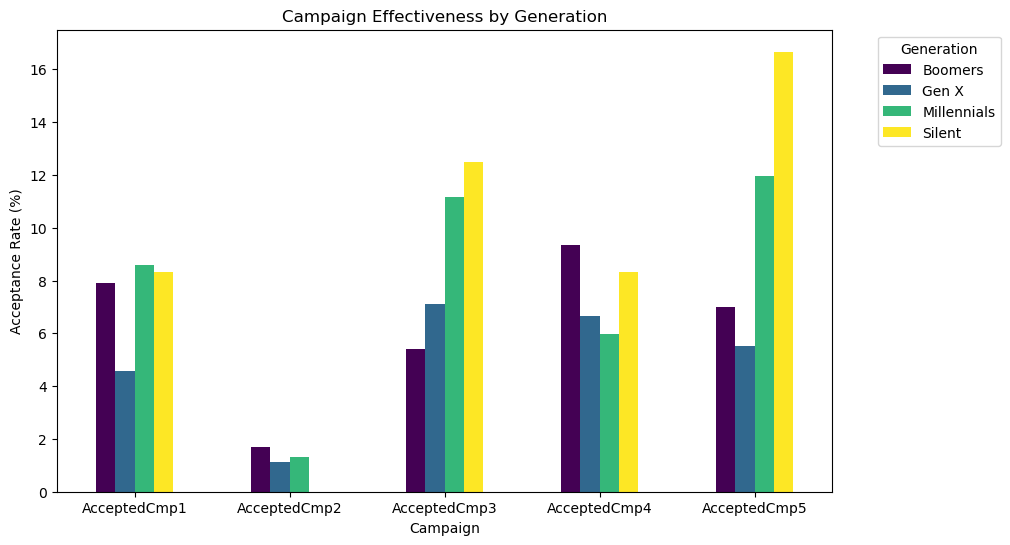

Chi-square Test for Generation:
AcceptedCmp1: Chi2 = 11.8680, p-value = 0.0078
AcceptedCmp2: Chi2 = 1.5099, p-value = 0.6800
AcceptedCmp3: Chi2 = 13.5956, p-value = 0.0035
AcceptedCmp4: Chi2 = 6.2363, p-value = 0.1007
AcceptedCmp5: Chi2 = 20.6661, p-value = 0.0001


Campaign Effectiveness by Household_type:
                           AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Household_Type                                                       
Children and Teenagers        1.405152      0.468384      6.088993   
No Children or Teenagers     17.268446      2.825746      7.535322   
Only Children                 0.963391      0.000000      9.633911   
Only Teenagers                3.516820      1.529052      5.963303   

                          AcceptedCmp4  AcceptedCmp5  
Household_Type                                        
Children and Teenagers        3.747073      0.468384  
No Children or Teenagers     10.832025     21.507064  
Only Children                 1.348748      1.156

<Figure size 640x480 with 0 Axes>

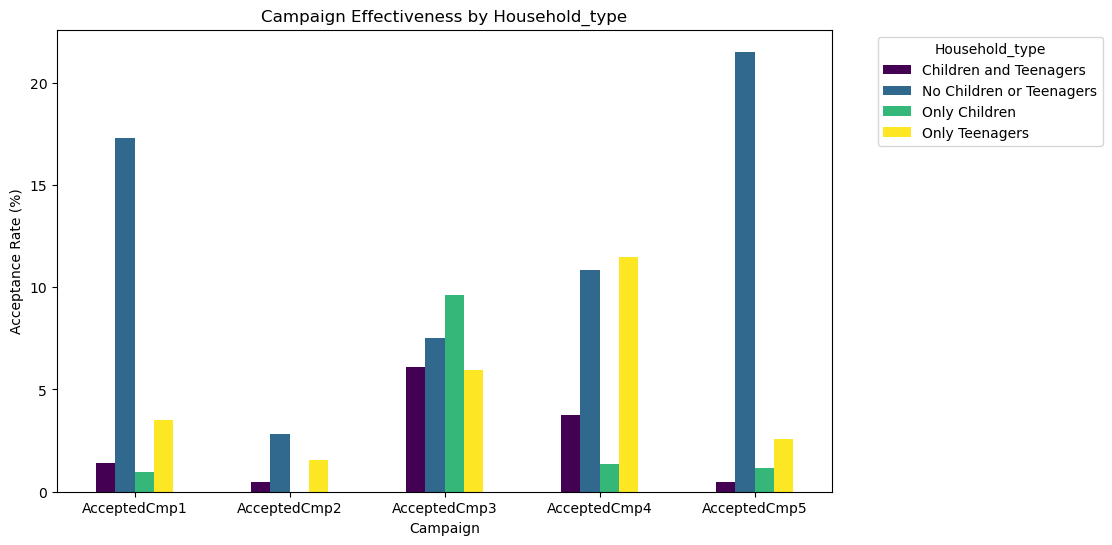

Chi-square Test for Household_type:
AcceptedCmp1: Chi2 = 177.1111, p-value = 0.0000
AcceptedCmp2: Chi2 = 20.2995, p-value = 0.0001
AcceptedCmp3: Chi2 = 6.8931, p-value = 0.0754
AcceptedCmp4: Chi2 = 62.2726, p-value = 0.0000
AcceptedCmp5: Chi2 = 271.7350, p-value = 0.0000


Campaign Effectiveness by Income_category:
                  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Income_Category                                                           
Low                  0.000000      0.000000      7.678571      0.178571   
Mid-Low              1.048951      0.699301      8.566434      4.370629   
Mid-High             3.113553      1.831502      5.128205     11.721612   
High                21.645796      2.862254      7.692308     13.774597   

                 AcceptedCmp5  
Income_Category                
Low                  0.000000  
Mid-Low              0.174825  
Mid-High             1.648352  
High                27.191413  


<Figure size 640x480 with 0 Axes>

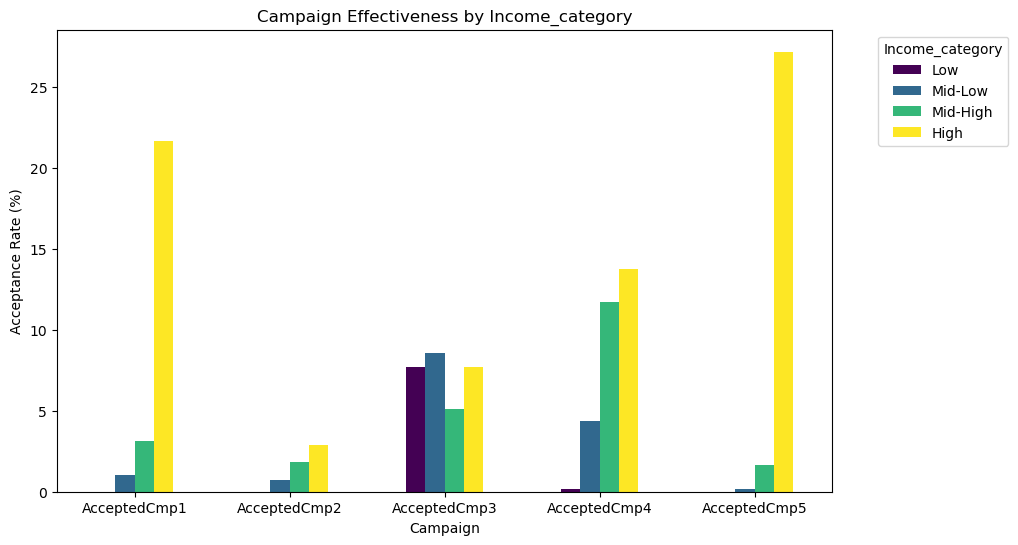

Chi-square Test for Income_category:
AcceptedCmp1: Chi2 = 290.7957, p-value = 0.0000
AcceptedCmp2: Chi2 = 20.1617, p-value = 0.0002
AcceptedCmp3: Chi2 = 5.4157, p-value = 0.1438
AcceptedCmp4: Chi2 = 97.5034, p-value = 0.0000
AcceptedCmp5: Chi2 = 442.8688, p-value = 0.0000


<Figure size 640x480 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# List of campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Function to calculate acceptance rates and plot for a given variable
def analyze_campaign_effectiveness(df, variable):
    # Calculate acceptance rate by demographic variable
    campaign_effectiveness = df.groupby(variable)[campaigns].mean() * 100  # Convert to percentages
    print("\n")
    print(f"Campaign Effectiveness by {variable.capitalize()}:\n", campaign_effectiveness)

    # Plot
    campaign_effectiveness.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.title(f'Campaign Effectiveness by {variable.capitalize()}')
    plt.xlabel('Campaign')
    plt.ylabel('Acceptance Rate (%)')
    plt.xticks(rotation=0)
    plt.legend(title=variable.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.savefig(f"{variable}")
    
    # Chi-square test for statistical significance
    print(f"Chi-square Test for {variable.capitalize()}:")
    chi2_results = {}
    for campaign in campaigns:
        contingency_table = pd.crosstab(df[variable], df[campaign])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[campaign] = (chi2, p)
        print(f"{campaign}: Chi2 = {chi2:.4f}, p-value = {p:.4f}")
        
    return chi2_results

# Analyze for each demographic variable
variables = ['Generation', 'Household_Type']
chi2_summary = {}

for var in variables:
    chi2_summary[var] = analyze_campaign_effectiveness(df, var)

# Income Analysis (as a continuous variable, it needs to be binned)
income_bins = pd.qcut(df['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
df['Income_Category'] = income_bins

chi2_summary['Income_Category'] = analyze_campaign_effectiveness(df, 'Income_Category')


### Campaign Effectiveness for Generations

Silent generation has the highest acceptance rate, particularly in Cmp5 (16.67%) and Cmp3 (12.50%). The lowest acceptance rates across campaign is Gen X with the highest is Cmp3 (7.11%).

Cmp1, Cmp3, and Cmp5 show that they are statistically significant across generational cohort. Meanwhile for the rest (Cmp2 and Cmp4), it does not show difference across generation.


Recommendations:
1. To keep the engagement with silent generation and millenials, as they both the highest, strategy in Cmp3 and Cmp5 can be implemented. And for Gen X, as the lowest overall rate, it can be explored to improve effectiveness.

2. Overall, Cmp5 has the highest variation in acceptance, it is valuable to further analyze what aspects of this campaign appeal to certain generation and thus leveraging these characteristics in future campaign


### Campaign Effectiveness for Household Type

Beside generation, it is also interesting to see the campaign in another point of view.

Houshold Type without chilern and teengaers shows the highest acceptance rate in most cases, especially in Cmp1 (17.27%), Cmp4 (10.83%), and Cmp5 (21.51%). This might be caused by higher purchasing power and no respobsibilities in fulfilling others' needs. 
Campaign for households with childern and teenagers shows a low effectiveness with Cmp3 is 6.09% and Cmp4 375%. It is indicating potential misalignment with their needs or priorities. 

Recommendation:
1. Cmp1, Cmp4, and Cmp5 could be optimized further for households with no childern or teenagers. The messages could emphasize products or services tailored to adults

2. Creating a campaign with family-friendly benefit, emphasizing values and so on can be a strategy. This is meant to create more inclusive campaign which covers all customers' segment.

3. Cmp3 can be used as a benchmark of versatile campaign given it has considerably acceptance rate and less significant to any household type


### Campaign Effectiveness by Income Category

High income category shows high acceptance rate across different campaign especialy in Cmp1 (21.65%), Cmp4 (27.19%), and Cmp5 (27.19%). This indicates that this higher income could yield greater engagement due to higher purchasing power and non-restricted budget.

Low income and mid-low income show low engagement accross campaign. Indicate they are more selective as well as the campaigns are not aligned with their priority needs.

Except for Cmp3, all campaign is statistically significant with income, meaning acceptance campaign rate varies between on income level (p<0.05). Since Cmp3 does not seem to be influenced by this, the strategy made in Cmp3 can be implement in the future campaign to reach more customers

Recommendations:

1. In creating more campaigns in the future, approach in Cmp1, Cmp4, and Cmp5 should be further studied and developoed to reach high-income customers. Moreover, it should highlight premium or exclusive products or offer tailored to their needs. 

3. Cmp3 and Cmp4 are middle-income friendly. Campaigns targeting these cusromers should emphasize value, benefit, and quality/

2. There needs to be evaluation for low and mid low customer to better align with their needs and priority.


### 7. Calculate discount sensitive customer

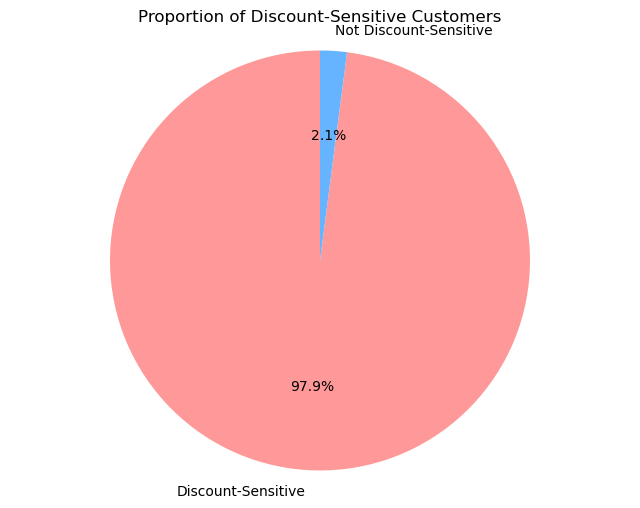

Total Customers: 2237
Discount-Sensitive Customers: 2191
Proportion of Discount-Sensitive Customers: 97.94%


<Figure size 640x480 with 0 Axes>

In [58]:
total_customers = df['ID'].nunique() 

discount_customers = df[df['NumDealsPurchases'] > 0]['ID'].nunique()

proportion_discount_sensitive = discount_customers / total_customers

labels = ['Discount-Sensitive', 'Not Discount-Sensitive']
sizes = [discount_customers, total_customers - discount_customers]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Discount-Sensitive Customers')
plt.show()
plt.savefig('Discount')

print(f'Total Customers: {total_customers}')
print(f'Discount-Sensitive Customers: {discount_customers}')
print(f'Proportion of Discount-Sensitive Customers: {proportion_discount_sensitive:.2%}')


97.94% customers classified as discount-sensitive. Discounts are significantly influencing purchasng decisions across customer base.

Reliance on discounts may erode profit margin, as customers tend to hold off unti discounts are offered, caused reduction in the effectiveness of non-discount pricing. This can also mean lack of brand loyalty, with customers probably switching brands or hold off until unless discount is offered.


Recommendations:
1. Varying promo
Loyalty points, exclusive or seasonal offers and bundled deals can be an option to slowly shift this behaviour while also maintaining customers' engagement. 
The points can further be redeemed for rewards such as free products, merchandise, and free shipping

2. Gradual reduction in discount frequency
To make the point 1 above working, there should be a gradual shift while also maintaining customers' behaviour.

3. Personalized offer based on history
High-value or loyal customer can be offered with personalized discount.

4. Incentivize Discount-Sensitive Purchases
Offer discount on frequently purchased items which can result in greater engagement with discount-senstivie customers. Might be through flash sale.

### 8. Customer Complain Analysis

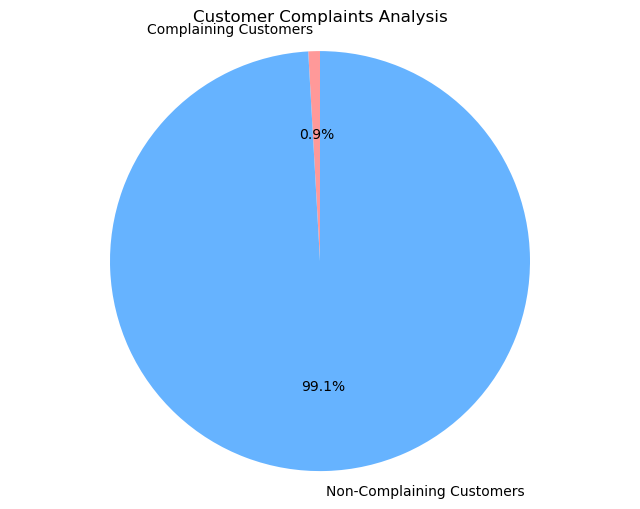

Total Customers: 2237
Complaining Customers: 20
Complaint Rate: 0.89%
Average Complaint Rate by Generation:
 Generation
Boomers        1.185771
Gen X          0.467727
Millennials    1.298701
Silent         4.166667
Name: Complain, dtype: float64


<Figure size 640x480 with 0 Axes>

In [63]:
total_customers = df['ID'].nunique()  
complaining_customers = df[df['Complain'] == 1]['ID'].nunique()

complaint_rate = complaining_customers / total_customers

labels = ['Complaining Customers', 'Non-Complaining Customers']
sizes = [complaining_customers, total_customers - complaining_customers]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Complaints Analysis')
plt.show()
plt.savefig('Complaint')

print(f'Total Customers: {total_customers}')
print(f'Complaining Customers: {complaining_customers}')
print(f'Complaint Rate: {complaint_rate:.2%}')

complaints_by_generation = df.groupby('Generation')['Complain'].mean() * 100
print("Average Complaint Rate by Generation:\n", complaints_by_generation)


Overall there is a very low complaint rate, only 20 out of 2237 customers, indicates high customer satisfaction.

Between generation, silent generation appear most likely to complaints. It may be caused by concerns or expectations regarding products or services. It is good to tailor customer service or support option for this generation.

Recommendations:
1. Feedback
Providing follow-up or open feedback after transaction to ensure any issues are promptly resolved might be a way to tackle this. This can be done especially for silent generation with relatively highest complains. This way will also increase customers' engagement.

2. Preventative measure
Periodic engagement with all customers' segment will help retaining customers' satisfaction and retaining supermarkets' well-known image of good service. This is also important to unveil issues that may not be reported.

3. Use this as a campaign
It is quite an achievement to have such a low complain rate, thus this can be publicly announced to reinforced positive perceptions and reduce complaints across generations.

In [50]:
df.to_csv('filename.csv', index=False)

## Conclusions

Data analysis and visualization manage to produce meaningful insights about customers' behaviour and prefecences. This enables business to have data-driven decisions. By analyzing purchasing patterns across various customers' segment, several insights obtained, such as:

- Trend identification: distinguish significant patterns in spending, channel preferences, and products

- Customer behavior understanding: understanding influental factors such as purchasing power, technology adaptation, household types, and channel preferences

- Marketing strategies personalization: tailoring needs to specific cohort

- Resources allocation optimization:Focus on strategies that maximze engagement

From those insights, recommendations can be made to tackle the problems and to further increasing supermarket’s profit, engaging more customer, and handling complaints.

